In [5]:
# Defines different wavelength limits
if emission_line = 'K':
    min_targ = 392.5
    max_targ = 393.5
    min_comp = 392
    max_comp = 394

elif emission_line = 'H':
    min_targ = 396.5
    max_targ = 397
    min_comp = 396
    max_comp = 397.5

# Load data and first 2 lines
data = np.loadtxt(filename,delimiter=',',skiprows=2)
line2 = np.genfromtxt(filename,delimiter=',',skip_header=1,max_rows=1)
f = open(filename,'r')
line1 = f.readline()
f.close()

# Pull starting time from first line & save as float
hour = float(line1[21:23])
minute = float(line1[24:26])
second = float(line1[27:])
start_time = hour + minute/60 + second/3600

# Pull time and relevant wavelengths from file
time = data[:,0]/3600+start_time
target_wavelengths = np.where((line2 > min_targ)&(line2 < max_targ))[0]
comparison_wavelengths = np.where(((line2 > min_comp)&(line2 < min_targ))|((line2 > max_targ)&(line2 < max_comp)))[0]
target_flux = [np.mean(i) for i in data[:,target_wavelengths]]
comparison_flux = [np.mean(i) for i in data[:,comparison_wavelengths]]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [39]:
allfiles = glob('reduced_venus_data/*')
filename = allfiles[0]

In [40]:
# Extracts data from file
def get_lcdata(name):
    # Open the first file and read the first two lines
    f=open(name,'r')
    line1 = f.readline()
    f.close()
    # Reads the rest of the data
    dat = np.loadtxt(name,skiprows=2)
    time = dat[:,0]
    target_flux = dat[:,1]
    comparison_flux = dat[:,2]
    return time,target_flux,comparison_flux,line1

In [114]:
def polydivide(filename):
    time,target_flux,comp_flux,date = get_lcdata(filename)

    # Fit resulting light curve to polynomial
    a=np.polyfit(time,target_flux,20)
    b=np.poly1d(a)
    # Divide light curve by fitted polynomial
    pflux = np.divide(target_flux,b(time))

    aa = np.polyfit(time,comp_flux,20)
    bb = np.poly1d(aa)
    cflux = np.divide(comp_flux,bb(time))
    return time+5,pflux,cflux

In [115]:
everythang = []

for i in allfiles:
    everythang.append(polydivide(i))

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditione

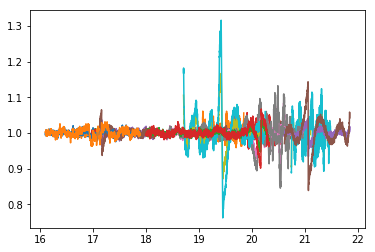

0: reduced_venus_data\rvenusK_20180404_1.dat
1: reduced_venus_data\rvenusK_20180404_2.dat
2: reduced_venus_data\rvenusK_20180410_1.dat
3: reduced_venus_data\rvenusK_20180418_1.dat
4: reduced_venus_data\rvenusK_20180418_2.dat
5: reduced_venus_data\rvenusK_20180423_1.dat
6: reduced_venus_data\rvenusK_20180423_2.dat
7: reduced_venus_data\rvenusK_20180423_3.dat
8: reduced_venus_data\rvenusK_20180423_4.dat
9: reduced_venus_data\rvenusK_20180424_1.dat
10: reduced_venus_data\rvenusK_20180426_1.dat
11: reduced_venus_data\rvenusK_20180426_2.dat
12: reduced_venus_data\rvenusK_20180426_3.dat


In [116]:
for i in everythang:
    plt.plot(i[0],i[1])
    plt.plot(i[0],i[2])

plt.show()

for i in range(len(allfiles)):
    print str(i)+': '+str(allfiles[i])

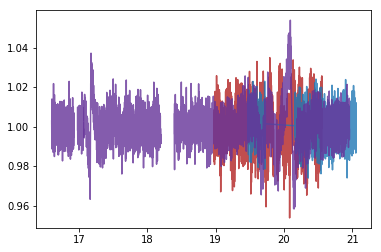

In [117]:
plt.plot(everythang[0][0],np.divide(everythang[0][1],everythang[0][2]),'firebrick',alpha=.8)
plt.plot(everythang[1][0],np.divide(everythang[1][1],everythang[1][2]),'firebrick',alpha=.8)
plt.plot(everythang[2][0],np.divide(everythang[2][1],everythang[2][2]),alpha=.8)
#plt.plot(everythang[3][0],np.divide(everythang[3][1],everythang[3][2]),'orange',alpha=.8)
#plt.plot(everythang[4][0],np.divide(everythang[4][1],everythang[4][2]),'orange',alpha=.8)
plt.plot(everythang[5][0],np.divide(everythang[5][1],everythang[5][2]),'rebeccapurple',alpha=.8)
plt.plot(everythang[6][0],np.divide(everythang[6][1],everythang[6][2]),'rebeccapurple',alpha=.8)
plt.plot(everythang[7][0],np.divide(everythang[7][1],everythang[7][2]),'rebeccapurple',alpha=.8)
plt.plot(everythang[8][0],np.divide(everythang[8][1],everythang[8][2]),'rebeccapurple',alpha=.8)
#plt.plot(everythang[9][0],np.divide(everythang[9][1],everythang[9][2]),alpha=.8)
#plt.plot(everythang[10][0],np.divide(everythang[10][1],everythang[10][2]),'teal',alpha=.8)
#plt.plot(everythang[11][0],np.divide(everythang[11][1],everythang[11][2]),'teal',alpha=.8)
#plt.plot(everythang[12][0],np.divide(everythang[12][1],everythang[12][2]),'teal',alpha=.8)

plt.show()

In [83]:
'''
OBESRVING NOTES

Weather notes:
clear days (from logs)
    4/23: baby flare @ 18:42
    4/26: not a thing (small rise in overall intensity @ 18:00, but no flare)
    
cloudy days (from logs)
    4/24: some variation, but caught no flares

other days (no logs)
    4/04: weird decrease in intensity @ 20:30?
    4/10: nothing
    4/18: weird variations?

'''

13


'\nOBESRVING NOTES\n\nWeather notes:\nclear days (from logs)\n    4/23: baby flare @ 18:42\n    4/26: not a thing (small rise in overall intensity @ 18:00, but no flare)\n    \ncloudy days (from logs)\n    4/24: some variation, but caught no flares\n\nother days (no logs)\n    4/04: weird decrease in intensity @ 20:30?\n    4/10: nothing\n    4/18: weird variations?\n\n'